# Classification using CNN model and PyTorch Training Loop

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

from pathlib import Path
import os

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets

In [3]:
image_path = Path("data")
train_dir = image_path / "train"
valid_dir = image_path / "valid"
test_dir = image_path / "test"

In [4]:
image_path.resolve()

PosixPath('/home/kpatelis/projects/pytorch-computer-vision/data')

In [5]:
# Walkthrough the directory and get the folder contents

# Function to extract - Maybe change to include check for image type
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(train_dir)

There are 20 directories and 0 images in 'data/train'.
There are 0 directories and 170 images in 'data/train/AMERICAN BITTERN'.
There are 0 directories and 133 images in 'data/train/AMERICAN GOLDFINCH'.
There are 0 directories and 193 images in 'data/train/AMERICAN DIPPER'.
There are 0 directories and 163 images in 'data/train/ABBOTTS BABBLER'.
There are 0 directories and 155 images in 'data/train/AFRICAN OYSTER CATCHER'.
There are 0 directories and 150 images in 'data/train/ALTAMIRA YELLOWTHROAT'.
There are 0 directories and 179 images in 'data/train/ABYSSINIAN GROUND HORNBILL'.
There are 0 directories and 180 images in 'data/train/ABBOTTS BOOBY'.
There are 0 directories and 161 images in 'data/train/ALBERTS TOWHEE'.
There are 0 directories and 135 images in 'data/train/AFRICAN CROWNED CRANE'.
There are 0 directories and 154 images in 'data/train/AFRICAN EMERALD CUCKOO'.
There are 0 directories and 179 images in 'data/train/AFRICAN PYGMY GOOSE'.
There are 0 directories and 166 images 

data/train/ABYSSINIAN GROUND HORNBILL/053.jpg
ABYSSINIAN GROUND HORNBILL
Random image path: data/train/ABYSSINIAN GROUND HORNBILL/053.jpg
Image class: ABYSSINIAN GROUND HORNBILL
Image height: 224
Image width: 224


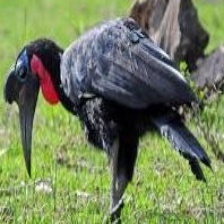

In [7]:
# Visualize random image from train

import random
from PIL import Image

random.seed(52)
image_path_list = list(train_dir.glob("*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

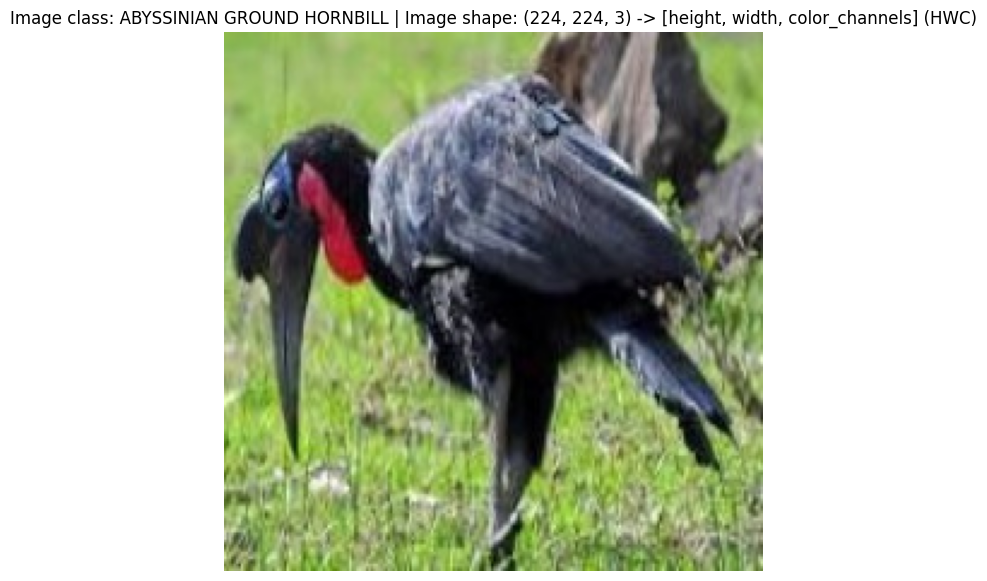

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False);

In [9]:
# Create data transformations
data_transform = transforms.Compose([
    transforms.Resize(size = (64, 64)), 
    transforms.RandomHorizontalFlip(p = 0.5), 
    transforms.ToTensor()
])

In [10]:
data_transform(img).shape, data_transform(img)

(torch.Size([3, 64, 64]),
 tensor([[[0.5765, 0.5843, 0.5725,  ..., 0.5294, 0.5412, 0.5490],
          [0.5804, 0.5843, 0.5725,  ..., 0.5412, 0.5373, 0.5373],
          [0.5961, 0.6039, 0.6078,  ..., 0.5765, 0.5686, 0.5608],
          ...,
          [0.4471, 0.4745, 0.5176,  ..., 0.4941, 0.5137, 0.5490],
          [0.5490, 0.5137, 0.4980,  ..., 0.5765, 0.5059, 0.5686],
          [0.5176, 0.5804, 0.5020,  ..., 0.5098, 0.5294, 0.5294]],
 
         [[0.6510, 0.6471, 0.6275,  ..., 0.7098, 0.7098, 0.7216],
          [0.6902, 0.6863, 0.6706,  ..., 0.7176, 0.7098, 0.7176],
          [0.7255, 0.7294, 0.7333,  ..., 0.7373, 0.7255, 0.7255],
          ...,
          [0.4902, 0.5373, 0.6118,  ..., 0.5412, 0.5608, 0.6078],
          [0.6196, 0.5922, 0.6196,  ..., 0.6196, 0.5529, 0.6314],
          [0.6078, 0.6745, 0.6314,  ..., 0.5725, 0.5882, 0.6000]],
 
         [[0.4392, 0.4627, 0.4706,  ..., 0.3098, 0.3098, 0.3059],
          [0.4157, 0.4314, 0.4196,  ..., 0.3373, 0.3294, 0.3216],
          [0.3

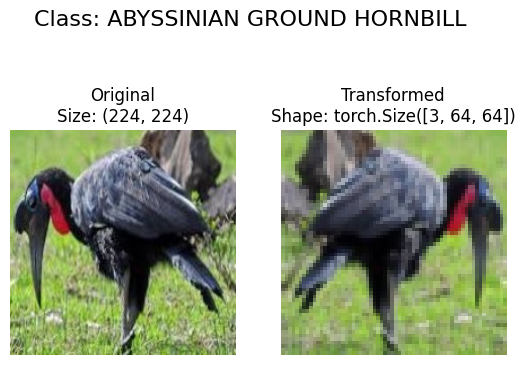

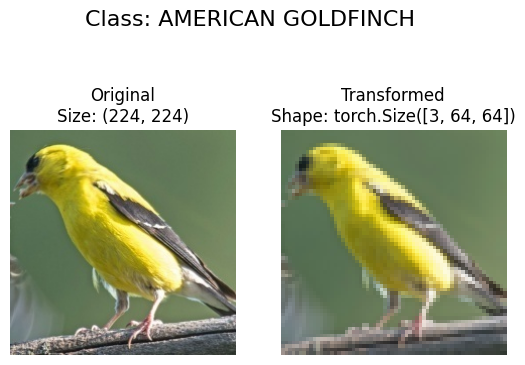

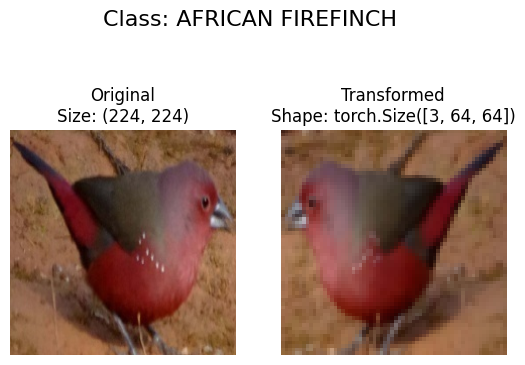

In [11]:
# Function to extract
# Function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images and loads/transforms them then plots original vs transformed
    """

    if seed:
        random.seed(52)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f)
            ax[1].imshow(transformed_image.permute(1,2,0))
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform,
                        n=3,
                        seed=42)

## Creating Dataloaders

### Option 1: Using ImageFolder

In [12]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=data_transform, # transform for the data
                                  target_transform=None) # transform for the target, label

valid_data = datasets.ImageFolder(root=valid_dir, 
                                 transform=data_transform, # transform for the data
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform, # transform for the data
                                 target_transform=None)

train_data, valid_data, test_data

(Dataset ImageFolder
     Number of datapoints: 3240
     Root location: data/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 100
     Root location: data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 100
     Root location: data/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [13]:
# Get class names as list
class_names = train_data.classes
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN DIPPER',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH']

In [14]:
class_dict = train_data.class_to_idx
class_dict

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'AFRICAN PIED HORNBILL': 7,
 'AFRICAN PYGMY GOOSE': 8,
 'ALBATROSS': 9,
 'ALBERTS TOWHEE': 10,
 'ALEXANDRINE PARAKEET': 11,
 'ALPINE CHOUGH': 12,
 'ALTAMIRA YELLOWTHROAT': 13,
 'AMERICAN AVOCET': 14,
 'AMERICAN BITTERN': 15,
 'AMERICAN COOT': 16,
 'AMERICAN DIPPER': 17,
 'AMERICAN FLAMINGO': 18,
 'AMERICAN GOLDFINCH': 19}

In [15]:
# This is how you can index on the train Dataset to get a single image and label
img, label = train_data[0][0],  train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Label datatype {type(label)}")
print(f"Class name: {class_names[label]}")

Image tensor:
 tensor([[[0.9255, 0.9176, 0.8980,  ..., 0.7529, 0.4078, 0.3373],
         [0.9216, 0.9137, 0.8980,  ..., 0.9294, 0.6353, 0.3843],
         [0.9176, 0.9137, 0.9020,  ..., 0.9765, 0.9098, 0.6745],
         ...,
         [0.5412, 0.6235, 0.4588,  ..., 0.2157, 0.1765, 0.1647],
         [0.4627, 0.5765, 0.5333,  ..., 0.2039, 0.1765, 0.1725],
         [0.4431, 0.5098, 0.4392,  ..., 0.2314, 0.1647, 0.1686]],

        [[0.9255, 0.9216, 0.9098,  ..., 0.7333, 0.3765, 0.2902],
         [0.9216, 0.9216, 0.9098,  ..., 0.9020, 0.6118, 0.3451],
         [0.9216, 0.9137, 0.9020,  ..., 0.9490, 0.8824, 0.6510],
         ...,
         [0.6353, 0.6784, 0.4706,  ..., 0.2078, 0.1765, 0.1647],
         [0.5882, 0.6510, 0.5608,  ..., 0.2039, 0.1765, 0.1686],
         [0.5804, 0.5961, 0.4706,  ..., 0.2275, 0.1686, 0.1686]],

        [[0.8902, 0.8745, 0.8510,  ..., 0.6118, 0.2824, 0.2314],
         [0.8745, 0.8627, 0.8431,  ..., 0.8039, 0.4824, 0.2627],
         [0.8667, 0.8549, 0.8353,  ..., 0.8

In [16]:
BATCH_SIZE = 2

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, 
                              num_workers=1, 
                              shuffle=True)

valid_dataloader = DataLoader(dataset=valid_data, 
                              batch_size=BATCH_SIZE, 
                              num_workers=1, 
                              shuffle=False)

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             num_workers=1, 
                             shuffle=False)

len(train_dataloader), len(valid_dataloader), len(test_dataloader)

(1620, 50, 50)

In [17]:
img, label = next(iter(train_dataloader))

print(f"Image batch shape: {img.shape}")
print(f"Label batch shape: {label.shape}")

Image batch shape: torch.Size([2, 3, 64, 64])
Label batch shape: torch.Size([2])


### Option 2: Using Custom Datasets (TBD)

## Create a model from scratch

In [18]:
# Create base CNN model - extract to function later
class BaseCNN(nn.Module):
    """
    Base CNN Model Architecture
    Based on: https://poloclub.github.io/cnn-explainer/
    """
    
    def __init__(self, input_shape:int, 
                 hidden_units: int, 
                 output_shape: int) -> None:
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1, 
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3), 
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=(3,3),
                      stride=1,
                      padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride = 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 13 * 13,
                      out_features=output_shape)
            
        )
        
    def forward(self, x):
        #x = self.conv_block1(x)
        #x = self.conv_block2(x)
        #x = self.classifier(x)
        #return x
        return self.classifier(self.conv_block2(self.conv_block1(x))) # benefits from operator fusion

In [19]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = BaseCNN(input_shape = 3, 
                hidden_units = 10, 
                output_shape = len(class_names)).to(device)
model

BaseCNN(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=20, bias=True)
  )
)

In [20]:
# Create train_step() - to extract
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               device = device):
    
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim = 1)
        train_acc += ((y_pred_class == y).sum().item() / len(y_pred))

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss, train_acc

# Create a test step
def test_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               #optimizer: torch.optim.Optimizer, 
               device = device):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)

    return test_loss, test_acc

In [21]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer = nn.CrossEntropyLoss(), 
          epochs:int = 5,
          device = device): 
    results = {"train_loss": [], 
               "train_acc": [], 
               "test_loss": [], 
               "test_acc": []
               }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model = model, 
                                           dataloader = train_dataloader,
                                           loss_fn = loss_fn, 
                                           optimizer = optimizer, 
                                           device=device)
        
        test_loss, test_acc = test_step(model = model, 
                                           dataloader = test_dataloader,
                                           loss_fn = loss_fn, 
                                           device=device)

        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {100*train_acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {100*test_acc:.2f}%")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

/home/kpatelis/projects/pytorch-computer-vision/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 20

model_0 = BaseCNN(input_shape = 3, 
                  hidden_units = 10, 
                  output_shape = len(train_data.classes)).to("cuda")

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr = 0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model = model_0, 
                        train_dataloader = train_dataloader, 
                        test_dataloader = valid_dataloader, 
                        optimizer = optimizer, 
                        loss_fn = loss_fn, 
                        epochs=NUM_EPOCHS, 
                        device="cuda")

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  5%|▌         | 1/20 [00:08<02:40,  8.46s/it]

Epoch: 0 | Train loss: 2.9964 | Train acc: 5.31% | Test loss: 2.9967 | Test acc: 5.00%


 10%|█         | 2/20 [00:16<02:26,  8.15s/it]

Epoch: 1 | Train loss: 2.9925 | Train acc: 5.62% | Test loss: 2.9983 | Test acc: 5.00%


 15%|█▌        | 3/20 [00:24<02:18,  8.18s/it]

Epoch: 2 | Train loss: 2.9917 | Train acc: 5.83% | Test loss: 2.9994 | Test acc: 5.00%


 20%|██        | 4/20 [00:31<02:05,  7.86s/it]

Epoch: 3 | Train loss: 2.9914 | Train acc: 5.74% | Test loss: 3.0004 | Test acc: 5.00%


 25%|██▌       | 5/20 [00:39<01:56,  7.75s/it]

Epoch: 4 | Train loss: 2.9913 | Train acc: 5.96% | Test loss: 3.0007 | Test acc: 5.00%


 30%|███       | 6/20 [00:46<01:45,  7.51s/it]

Epoch: 5 | Train loss: 2.9912 | Train acc: 5.96% | Test loss: 3.0011 | Test acc: 5.00%


 35%|███▌      | 7/20 [00:53<01:37,  7.47s/it]

Epoch: 6 | Train loss: 2.9911 | Train acc: 5.83% | Test loss: 3.0014 | Test acc: 5.00%


 40%|████      | 8/20 [01:01<01:28,  7.34s/it]

Epoch: 7 | Train loss: 2.9912 | Train acc: 5.71% | Test loss: 3.0016 | Test acc: 5.00%


 45%|████▌     | 9/20 [01:08<01:21,  7.45s/it]

Epoch: 8 | Train loss: 2.9911 | Train acc: 5.96% | Test loss: 3.0014 | Test acc: 5.00%


 50%|█████     | 10/20 [01:15<01:13,  7.38s/it]

Epoch: 9 | Train loss: 2.9912 | Train acc: 5.12% | Test loss: 3.0017 | Test acc: 5.00%


 55%|█████▌    | 11/20 [01:23<01:07,  7.55s/it]

Epoch: 10 | Train loss: 2.9912 | Train acc: 5.96% | Test loss: 3.0018 | Test acc: 5.00%


 60%|██████    | 12/20 [01:30<00:58,  7.36s/it]

Epoch: 11 | Train loss: 2.9911 | Train acc: 5.96% | Test loss: 3.0019 | Test acc: 5.00%


 65%|██████▌   | 13/20 [01:38<00:52,  7.46s/it]

Epoch: 12 | Train loss: 2.9911 | Train acc: 5.96% | Test loss: 3.0019 | Test acc: 5.00%


 70%|███████   | 14/20 [01:45<00:44,  7.46s/it]

Epoch: 13 | Train loss: 2.9911 | Train acc: 5.90% | Test loss: 3.0016 | Test acc: 5.00%


 75%|███████▌  | 15/20 [01:53<00:36,  7.38s/it]

Epoch: 14 | Train loss: 2.9911 | Train acc: 5.90% | Test loss: 3.0016 | Test acc: 5.00%


 80%|████████  | 16/20 [02:00<00:29,  7.25s/it]

Epoch: 15 | Train loss: 2.9911 | Train acc: 5.83% | Test loss: 3.0017 | Test acc: 5.00%


 85%|████████▌ | 17/20 [02:07<00:21,  7.22s/it]

Epoch: 16 | Train loss: 2.9911 | Train acc: 5.93% | Test loss: 3.0016 | Test acc: 5.00%


 90%|█████████ | 18/20 [02:14<00:14,  7.19s/it]

Epoch: 17 | Train loss: 2.9911 | Train acc: 5.56% | Test loss: 3.0017 | Test acc: 5.00%


 95%|█████████▌| 19/20 [02:21<00:07,  7.17s/it]

Epoch: 18 | Train loss: 2.9911 | Train acc: 5.90% | Test loss: 3.0017 | Test acc: 5.00%


100%|██████████| 20/20 [02:28<00:00,  7.43s/it]

Epoch: 19 | Train loss: 2.9911 | Train acc: 5.74% | Test loss: 3.0019 | Test acc: 5.00%
Total training time: 148.554 seconds
